In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/ts.csv", names=["Month", "Passengers"])
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
df.Month = pd.to_datetime(df.Month, format="%Y-%m")

In [3]:
df.index = df.Month

In [4]:
df = df.drop(labels=["Month"], axis=1)

In [5]:
df.head(2)

,Passengers
Month,
1949-01-01,112
1949-02-01,118


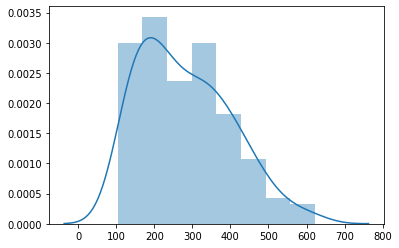

In [6]:
import seaborn as sb
sb.distplot(df)

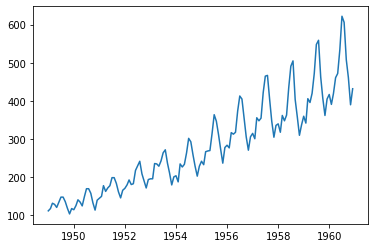

In [7]:
import matplotlib.pyplot as plt
plt.plot(df)

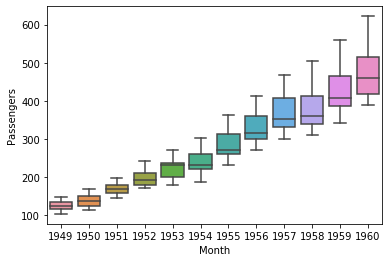

In [8]:
sb.boxplot(df.index.year, df.Passengers)

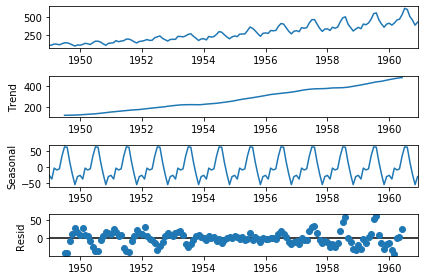

In [9]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(df).plot()
plt.show()

In [10]:
rm = df.rolling(window=12).mean() # rolling mean
rstd = df.rolling(window=12).std() # rolling standard deviation

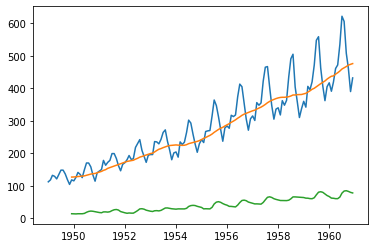

In [11]:
plt.plot(df)
plt.plot(rm)
plt.plot(rstd)

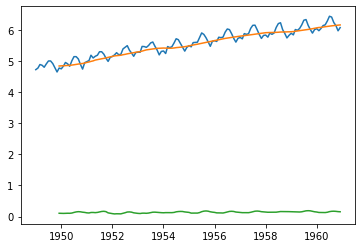

In [12]:
import numpy as np
df_log = np.log(df)
rm_log = df_log.rolling(window=12).mean() # rolling mean
rstd_log = df_log.rolling(window=12).std() # rolling standard deviation
plt.plot(df_log)
plt.plot(rm_log)
plt.plot(rstd_log)

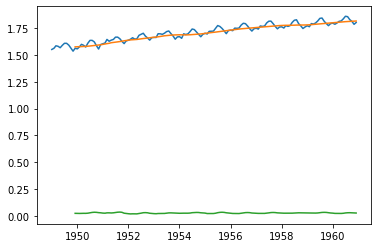

In [13]:
import numpy as np
df_log_log = np.log(np.log(df))
rm_log_log = df_log_log.rolling(window=12).mean() # rolling mean
rstd_log_log = df_log_log.rolling(window=12).std() # rolling standard deviation
plt.plot(df_log_log)
plt.plot(rm_log_log)
plt.plot(rstd_log_log)

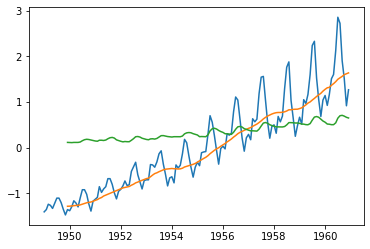

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df), index=df.index, columns=df.columns)
rm_scaled = df_scaled.rolling(window=12).mean() # rolling mean
rstd_scaled = df_scaled.rolling(window=12).std() # rolling standard deviation
plt.plot(df_scaled)
plt.plot(rm_scaled)
plt.plot(rstd_scaled)

In [15]:
from statsmodels.tsa.stattools import adfuller
# q = adfuller(df_scaled.Passengers)
# q = adfuller(df_log.Passengers)
q = adfuller(df_log_log.Passengers)

pval = q[1]
pval

0.22258989117061467

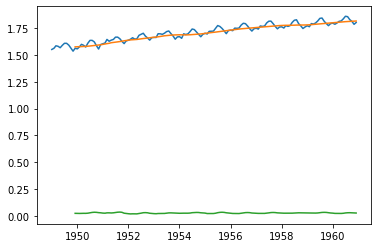

In [16]:
import numpy as np
df_log_log = np.log(np.log(df))
rm_log_log = df_log_log.rolling(window=12).mean() # rolling mean
rstd_log_log = df_log_log.rolling(window=12).std() # rolling standard deviation
plt.plot(df_log_log)
plt.plot(rm_log_log)
plt.plot(rstd_log_log)

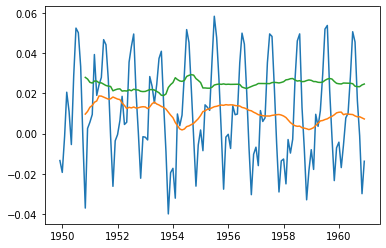

In [26]:
q = df_log_log - rm_log_log
rm_q = q.rolling(window=12).mean()
rstd_q = q.rolling(window=12).std()
plt.plot(q)
plt.plot(rm_q)
plt.plot(rstd_q)
# plt.yticks([x/4 for x in list(range(0, 7, 1))])

In [27]:
# adfuller(q.Passengers)
adfuller(q.Passengers[q.Passengers.notna()])[1]

0.04044134645742491

In [28]:
# Forecasting(MA, AR, ARIMA):
# Short term --> tomorrow, next week forecasts
# Mid term --> after 6-8 months
# Long term --> after 1-2 years

In [29]:
df.shape

(144, 1)

In [30]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [32]:
trd = df[df.index.year <= 1958]
tsd = df[df.index.year > 1958]

In [33]:
trd

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1958-08-01,505
1958-09-01,404
1958-10-01,359


In [34]:
tsd

,Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


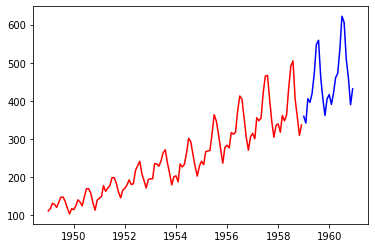

In [35]:
plt.plot(trd, c="red")
plt.plot(tsd, c="blue")
plt.show()

In [76]:
trd = df[df.index.year <= 1958]
tsd = df[df.index.year > 1958]

trd = df_log_log[df_log_log.index.year <= 1958]
tsd = df_log_log[df_log_log.index.year > 1958]

trd = q[q.index.year <= 1958]
tsd = q[q.index.year > 1958]

df_log_log.rolling(window=12).mean().head(15)
q.head(15)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


from statsmodels.tsa.ar_model import AR
model = AR(trd)
model = model.fit()
forecast = model.predict(start="1959-01-01", end="1960-12-01")
tsd["Forecasted_from_AR"] = forecast

In [50]:
tsd

,Passengers,Forecasted_from_AR
Month,,
1959-01-01,1.772594,1.768202
1959-02-01,1.763842,1.758778
1959-03-01,1.792818,1.778943
1959-04-01,1.788657,1.773715
1959-05-01,1.798446,1.785695
1959-06-01,1.817586,1.815010
1959-07-01,1.841545,1.834054
1959-08-01,1.844692,1.836654
1959-09-01,1.814454,1.804344


In [61]:
df_compare = df[df.index.year > 1958].copy(deep=True)
df_compare["Forecast"] = [math.exp(math.exp(f)) for f in forecast]

In [62]:
df_compare

,Passengers,Forecast
Month,,
1959-01-01,360,350.832086
1959-02-01,342,332.067172
1959-03-01,406,373.752708
1959-04-01,396,362.384407
1959-05-01,420,389.056773
1959-06-01,472,464.582774
1959-07-01,548,522.804363
1959-08-01,559,531.396144
1959-09-01,463,435.276664


In [64]:
q[q<=1958]

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.045428
1960-09-01,0.016259
1960-10-01,-0.001156
